In [4]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [5]:
N=50
np.random.seed(0)
x=np.sort(np.random.uniform(0,6,N),axis=0)
x

array([ 0.1127388 ,  0.12131038,  0.36135283,  0.42621635,  0.5227758 ,
        0.70964656,  0.77355779,  0.86011972,  1.26229537,  1.58733367,
        1.89257011,  2.1570474 ,  2.18226463,  2.30064911,  2.48797164,
        2.5419288 ,  2.62219172,  2.62552327,  2.73690199,  2.76887617,
        3.13108993,  3.17336952,  3.2692991 ,  3.29288102,  3.40826737,
        3.41060369,  3.61658026,  3.67257434,  3.70160398,  3.70581298,
        3.83952613,  3.87536468,  4.00060029,  4.02382722,  4.09092179,
        4.18578718,  4.2911362 ,  4.64540214,  4.66894051,  4.68317506,
        4.75035023,  4.79495139,  4.99571907,  5.22007289,  5.350638  ,
        5.55357983,  5.66248847,  5.6680135 ,  5.78197656,  5.87171005])

In [6]:
y=2*np.sin(x)+0.1*np.random.randn(N)
x=x.reshape(-1,1)

In [7]:
np.sin(1)

0.8414709848078965

In [8]:
y

array([ 0.05437325,  0.43710367,  0.65611482,  0.78304981,  0.87329469,
        1.38088042,  1.23598022,  1.49456731,  1.81603293,  2.03841677,
        1.84627139,  1.54797796,  1.63479377,  1.53337832,  1.22278185,
        1.15897721,  0.92928812,  0.95065638,  0.72022281,  0.69233817,
       -0.06030957, -0.23617129, -0.23697659, -0.34160192, -0.69007014,
       -0.48527812, -1.00538468, -1.00756566, -0.98948253, -1.05661601,
       -1.17133143, -1.46283398, -1.47415531, -1.61280243, -1.7131299 ,
       -1.78692494, -1.85631003, -1.98989791, -2.11462751, -1.90906396,
       -1.95199287, -2.14681169, -1.77143442, -1.55815674, -1.48840245,
       -1.35114367, -1.27027958, -1.04875251, -1.00128962, -0.67767925])

In [9]:
print('SVR-RBF')
svr_rbf=svm.SVR(kernel='rbf',gamma=0.2,C=100)
svr_rbf.fit(x,y)
print('SVR-Linear')
svr_linear=svm.SVR(kernel='linear',C=100)
svr_linear.fit(x,y)
print('SVR-Polynomial')
svr_poly=svm.SVR(kernel='poly',C=100,degree=3)
svr_poly.fit(x,y)
print('fit Ok')


SVR-RBF
SVR-Linear
SVR-Polynomial
fit Ok


In [11]:
x_test=np.linspace(x.min(),1.5*x.max(),100).reshape(-1,1)
y_rbf=svr_rbf.predict(x_test)
y_linear=svr_linear.predict(x_test)
y_poly=svr_poly.predict(x_test)

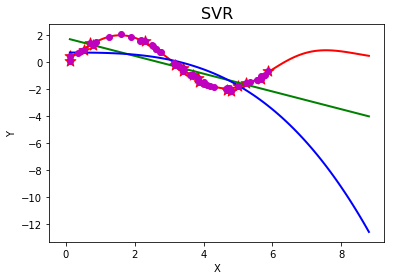

In [12]:
plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF')
plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear')
plt.plot(x_test, y_poly, 'b-', linewidth=2, label='poly')
plt.plot(x, y, 'mo', markersize=6)
plt.scatter(x[svr_rbf.support_],
            y[svr_rbf.support_],
            s=130,
            c='r',
            marker='*',
            label='RBF SV')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()